In [3]:
# dataset from https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')


In [4]:
train = pd.read_csv("./input/Health Insurance Cross Sell Prediction/train.csv")
test = pd.read_csv("./input/Health Insurance Cross Sell Prediction/test.csv")

In [5]:
print(train.shape, test.shape)

(381109, 12) (127037, 11)


In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

# Analysing The Features

# Categorical features

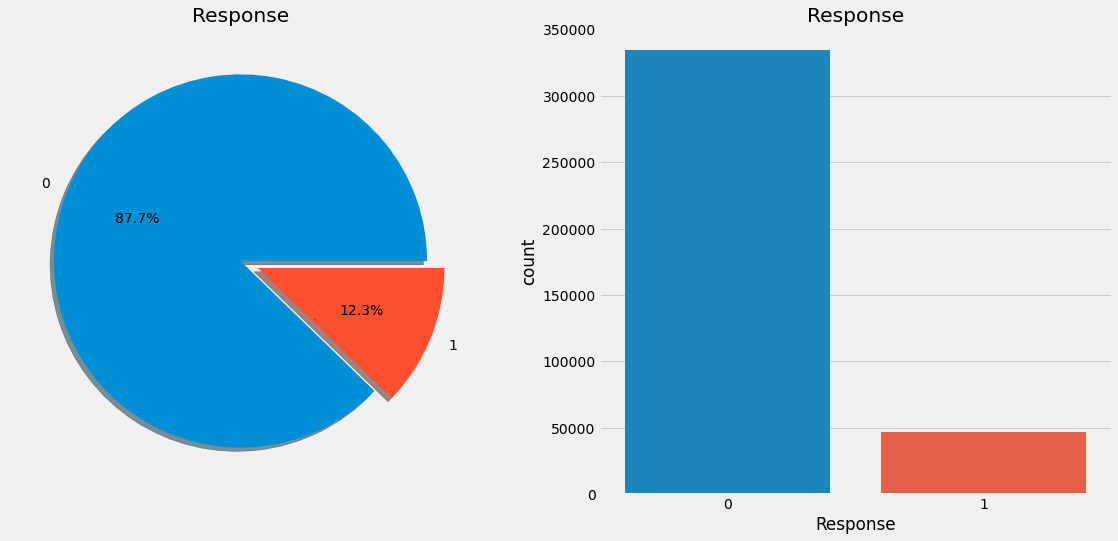

In [9]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train["Response"].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Response")
ax[0].set_ylabel('')
sns.countplot("Response",data=train,ax=ax[1])
ax[1].set_title("Response")
plt.show()

# Previously_Insured

In [10]:
train.groupby(['Previously_Insured',"Response"])["Response"].count()

Previously_Insured  Response
0                   0           159929
                    1            46552
1                   0           174470
                    1              158
Name: Response, dtype: int64

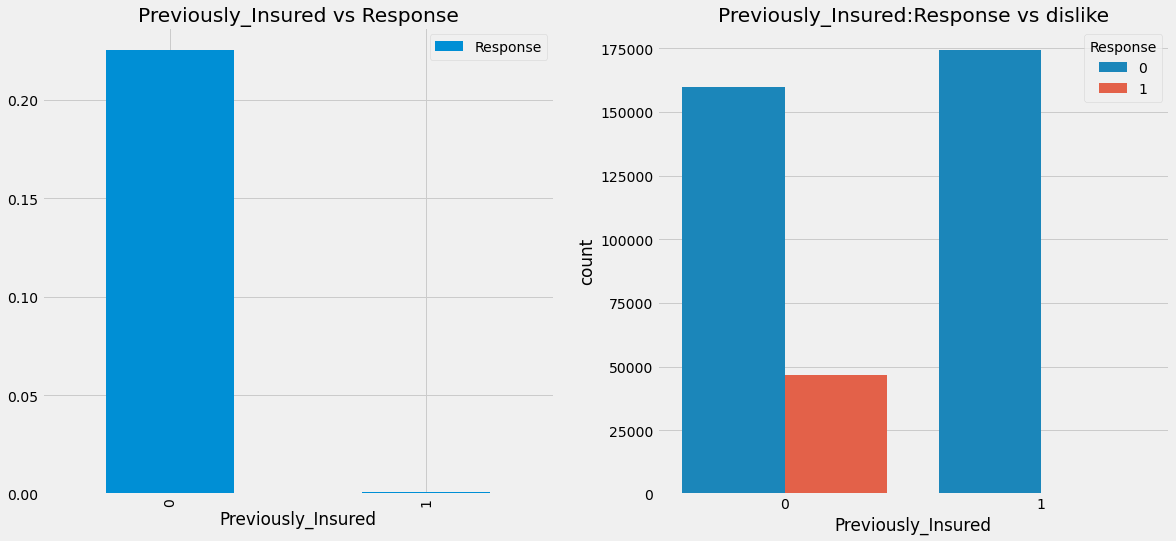

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Previously_Insured',"Response"]].groupby(['Previously_Insured']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Previously_Insured vs Response')
sns.countplot('Previously_Insured',hue="Response",data=train,ax=ax[1])
ax[1].set_title('Previously_Insured:Response vs dislike')
plt.show()

# Gender

In [12]:
train.groupby(['Gender',"Response"])["Response"].count()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: Response, dtype: int64

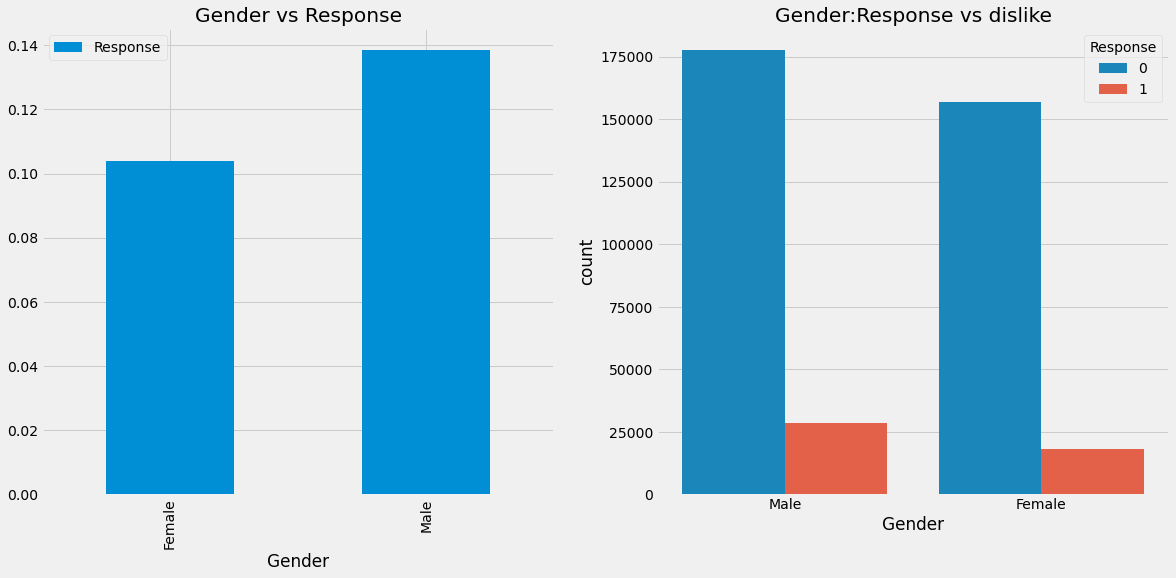

In [13]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Gender',"Response"]].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Gender vs Response')
sns.countplot('Gender',hue="Response",data=train,ax=ax[1])
ax[1].set_title('Gender:Response vs dislike')
plt.show()

# Driving_License

In [14]:
train.groupby(['Driving_License',"Response"])["Response"].count()

Driving_License  Response
0                0              771
                 1               41
1                0           333628
                 1            46669
Name: Response, dtype: int64

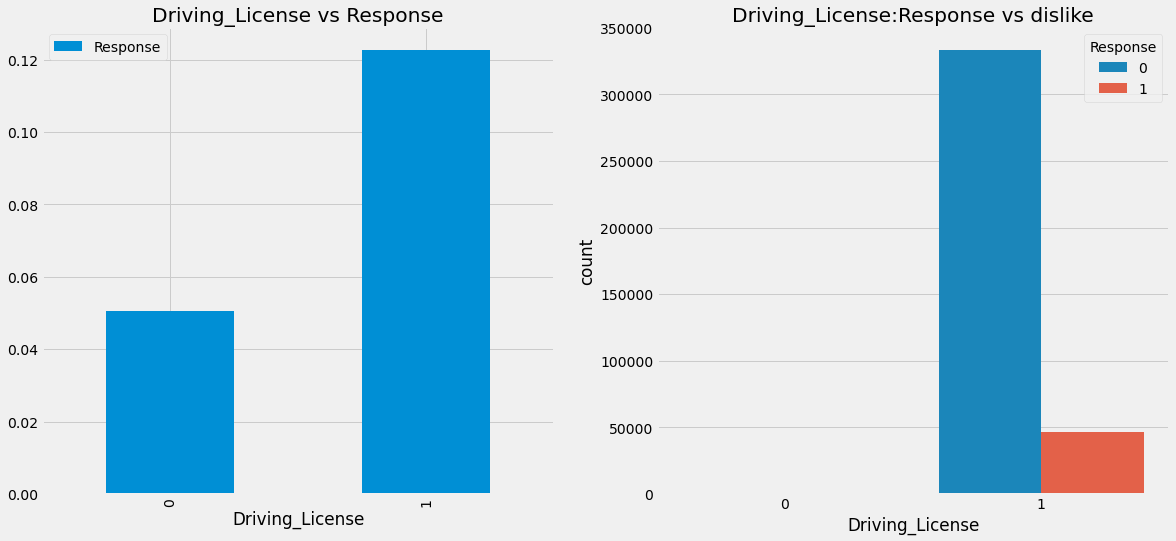

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Driving_License',"Response"]].groupby(['Driving_License']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Driving_License vs Response')
sns.countplot('Driving_License',hue="Response",data=train,ax=ax[1])
ax[1].set_title('Driving_License:Response vs dislike')
plt.show()

# Vehicle_Age

In [16]:
pd.crosstab([train.Vehicle_Age], train.Response).style.background_gradient(cmap='summer_r')

Response,0,1
Vehicle_Age,,
1-2 Year,165510,34806
< 1 Year,157584,7202
> 2 Years,11305,4702


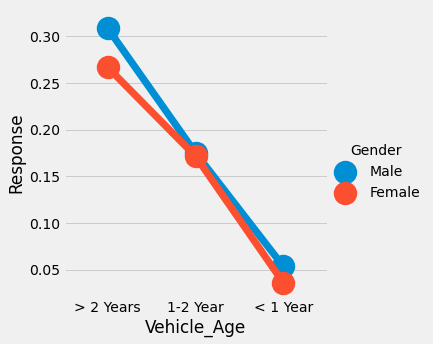

In [17]:
sns.factorplot('Vehicle_Age','Response', hue='Gender',data=train)
plt.show()

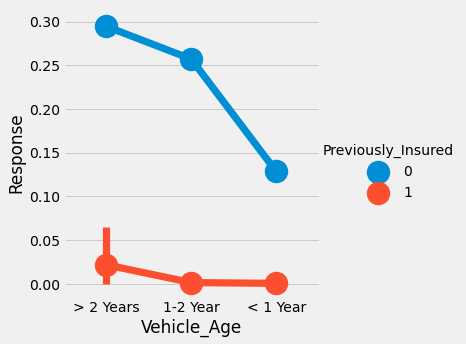

In [18]:
sns.factorplot('Vehicle_Age','Response', hue='Previously_Insured',data=train)
plt.show()

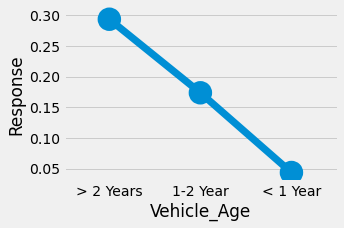

In [19]:
sns.factorplot('Vehicle_Age','Response',data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# Continous Features

# Age

In [20]:
print('Oldest was of:',train['Age'].max(),'Years')
print('Youngest was of:',train['Age'].min(),'Years')
print('Average Age:',train['Age'].mean(),'Years')

Oldest was of: 85 Years
Youngest was of: 20 Years
Average Age: 38.822583565331705 Years


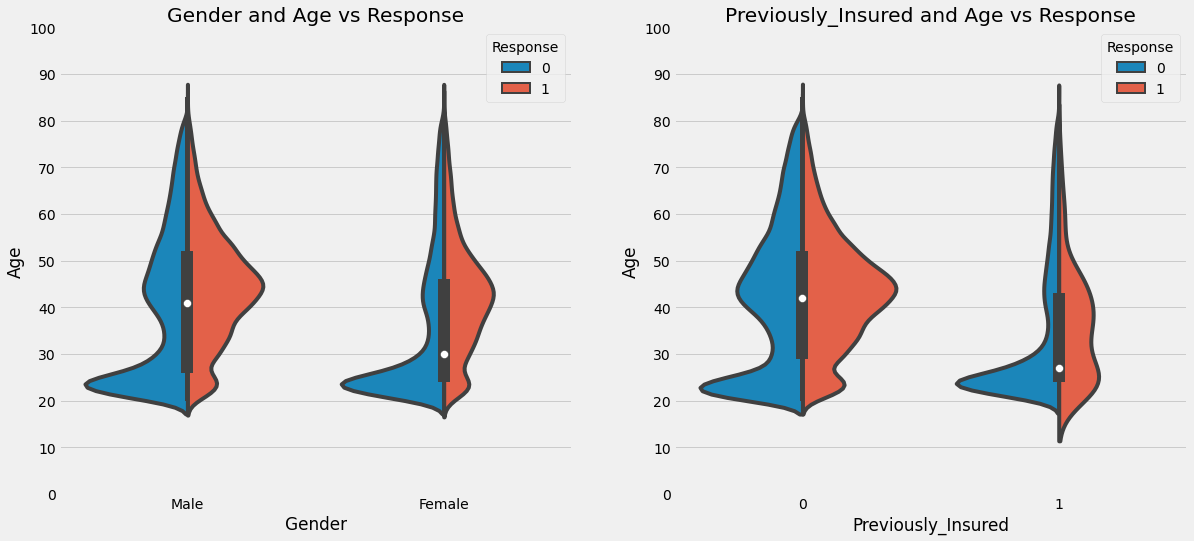

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Gender","Age", hue="Response", data=train,split=True,ax=ax[0])
ax[0].set_title('Gender and Age vs Response')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Previously_Insured","Age", hue="Response", data=train,split=True,ax=ax[1])
ax[1].set_title('Previously_Insured and Age vs Response')
ax[1].set_yticks(range(0,110,10))
plt.show()

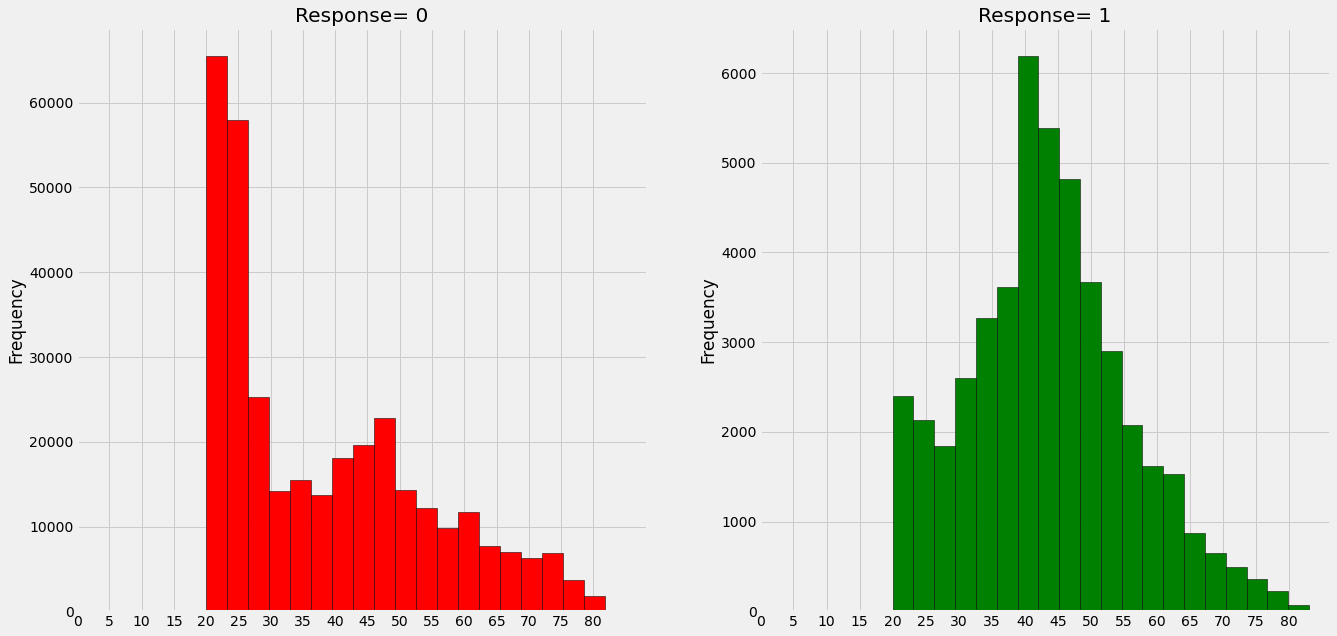

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Response']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Response= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Response']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Response= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Annual_Premium

In [23]:
print('Highest was :',train['Annual_Premium'].max())
print('Lowest was :',train['Annual_Premium'].min())
print('Average was:',train['Annual_Premium'].mean())

Highest was : 540165.0
Lowest was : 2630.0
Average was: 30564.389581458323


Text(0.5, 1.0, 'Response=0')

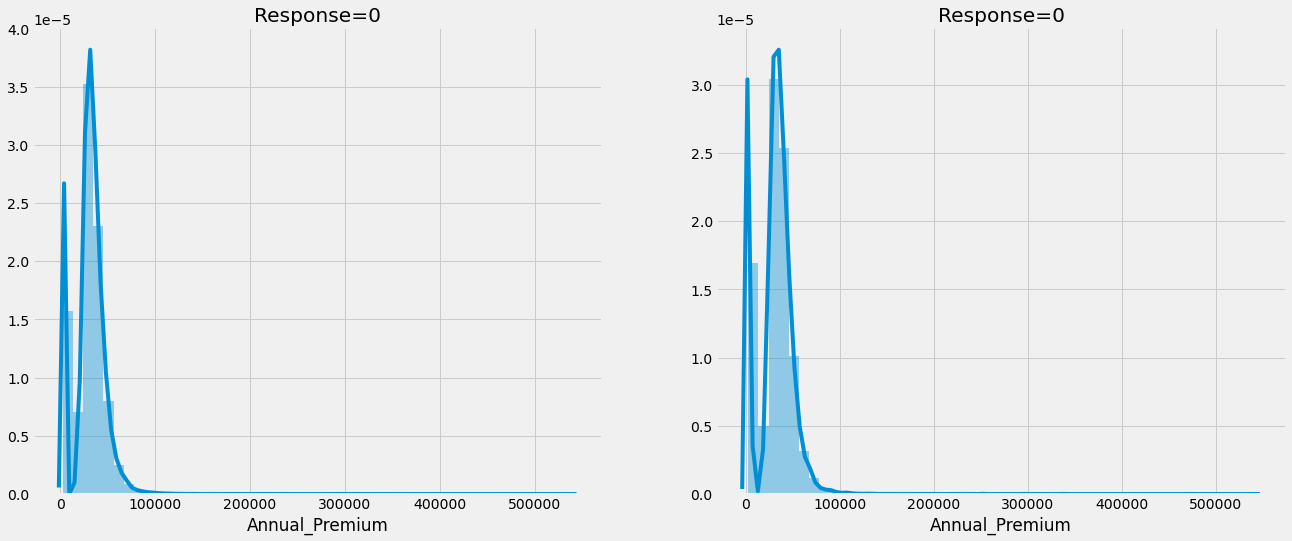

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(train[train['Response']==0].Annual_Premium,ax=ax[0])
ax[0].set_title('Response=0')
sns.distplot(train[train['Response']==1].Annual_Premium,ax=ax[1])
ax[1].set_title('Response=0')

# Discrete Feature

#  Region_Code

In [25]:
pd.crosstab([train.Region_Code],train.Response).style.background_gradient(cmap='summer_r')

Response,0,1
Region_Code,,
0.0,1847,174
1.0,899,109
2.0,3751,287
3.0,8070,1181
4.0,1516,285
5.0,1131,148
6.0,5841,439
7.0,2847,432
8.0,30620,3257


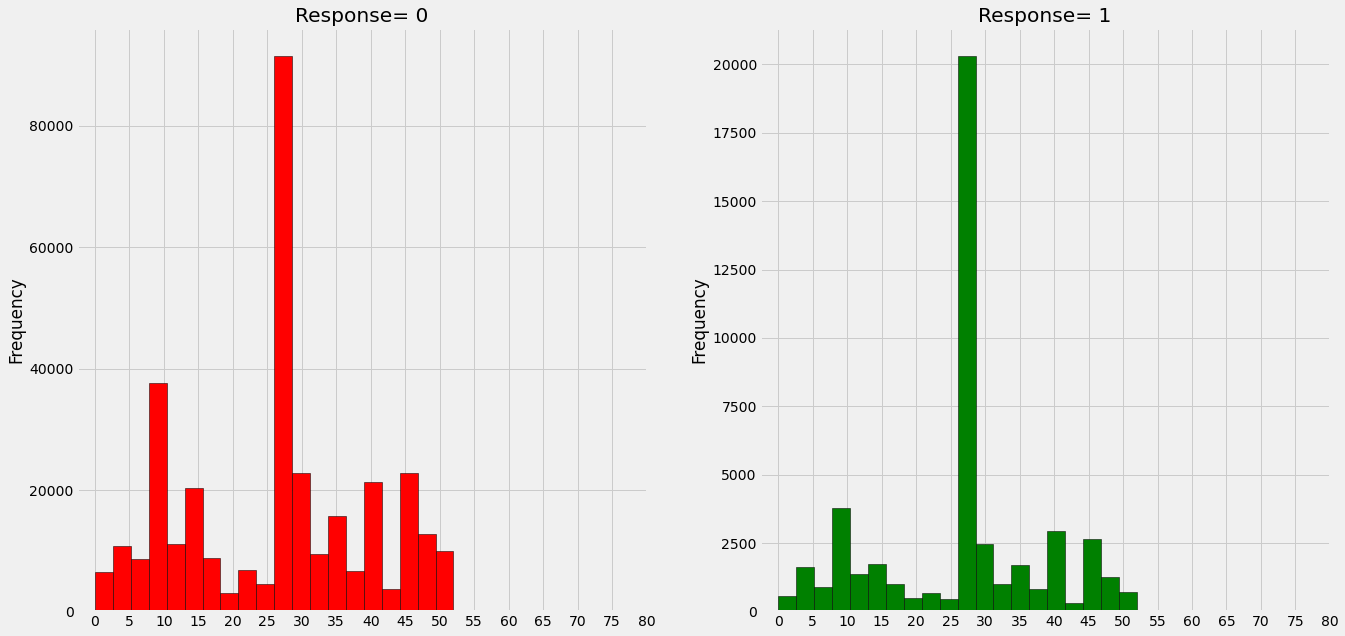

In [26]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Response']==0].Region_Code.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Response= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Response']==1].Region_Code.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Response= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Part2: Feature Engineering and Data Cleaning

# Age_band

In [27]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_band
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,4


In [28]:
test['Age_band']=0
test.loc[test['Age']<=16,'Age_band']=0
test.loc[(test['Age']>16)&(test['Age']<=32),'Age_band']=1
test.loc[(test['Age']>32)&(test['Age']<=48),'Age_band']=2
test.loc[(test['Age']>48)&(test['Age']<=64),'Age_band']=3
test.loc[test['Age']>64,'Age_band']=4
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_band
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53,1
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111,2


# Annual_Premium_Range

In [29]:
train['Annual_Premium_Range']=pd.qcut(train['Annual_Premium'],5)
train.groupby(['Annual_Premium_Range'])['Response'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Response
Annual_Premium_Range,
"(2629.999, 21583.6]",0.123993
"(21583.6, 29082.0]",0.099087
"(29082.0, 34406.0]",0.112105
"(34406.0, 41711.0]",0.129735
"(41711.0, 540165.0]",0.147901


In [30]:
train['Annual_Premium_cat']=0
train.loc[(train['Annual_Premium']>2629.999)&(train['Annual_Premium']<=21583.6),'Annual_Premium_cat']=0
train.loc[(train['Annual_Premium']>21583.6)&(train['Annual_Premium']<=29082.0),'Annual_Premium_cat']=1
train.loc[(train['Annual_Premium']>29082.0)&(train['Annual_Premium']<=34406.0),'Annual_Premium_cat']=2
train.loc[(train['Annual_Premium']>34406.0)&(train['Annual_Premium']<=41711.0),'Annual_Premium_cat']=3
train.loc[(train['Annual_Premium']>41711.0)&(train['Annual_Premium']<=540165.0),'Annual_Premium_cat']=4

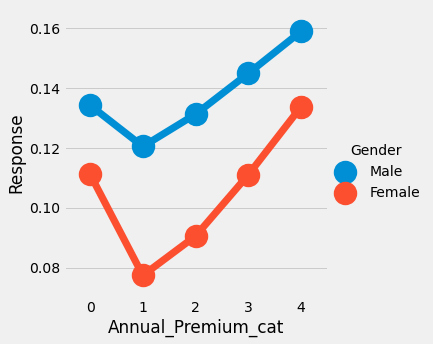

In [31]:
sns.factorplot('Annual_Premium_cat','Response',data=train,hue='Gender')
plt.show()

In [32]:
pd.qcut(test['Annual_Premium'],5)

0          (34384.0, 41722.0]
1          (29007.4, 34384.0]
2          (34384.0, 41722.0]
3          (34384.0, 41722.0]
4         (41722.0, 472042.0]
                 ...         
127032     (29007.4, 34384.0]
127033     (21531.0, 29007.4]
127034     (29007.4, 34384.0]
127035    (41722.0, 472042.0]
127036     (21531.0, 29007.4]
Name: Annual_Premium, Length: 127037, dtype: category
Categories (5, interval[float64]): [(2629.999, 21531.0] < (21531.0, 29007.4] < (29007.4, 34384.0] < (34384.0, 41722.0] < (41722.0, 472042.0]]

In [33]:
test['Annual_Premium_cat']=0
test.loc[(test['Annual_Premium']>2629.999)&(test['Annual_Premium']<=21531.0),'Annual_Premium_cat']=0
test.loc[(test['Annual_Premium']>21531.0)&(test['Annual_Premium']<=29007.4),'Annual_Premium_cat']=1
test.loc[(test['Annual_Premium']>29007.4)&(test['Annual_Premium']<=34384.0),'Annual_Premium_cat']=2
test.loc[(test['Annual_Premium']>34384.0)&(test['Annual_Premium']<=41722.0),'Annual_Premium_cat']=3
test.loc[(test['Annual_Premium']>41722.0)&(test['Annual_Premium']<=472042.0),'Annual_Premium_cat']=4

# Converting String Values into Numeric

In [34]:
train['Gender'].replace(['Male','Female'],[0,1],inplace=True)
train['Vehicle_Damage'].replace(['No', 'Yes'],[0,1],inplace=True)
train['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2],inplace=True)


In [35]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_band,Annual_Premium_Range,Annual_Premium_cat
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,2,"(34406.0, 41711.0]",3
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,4,"(29082.0, 34406.0]",2
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,2,"(34406.0, 41711.0]",3
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,1,"(21583.6, 29082.0]",1
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,1,"(21583.6, 29082.0]",1


In [36]:
test['Gender'].replace(['Male','Female'],[0,1],inplace=True)
test['Vehicle_Damage'].replace(['No', 'Yes'],[0,1],inplace=True)
test['Vehicle_Age'].replace(['< 1 Year','1-2 Year','> 2 Years'],[0,1,2],inplace=True)
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Age_band,Annual_Premium_cat
0,381110,0,25,1,11.0,1,0,0,35786.0,152.0,53,1,3
1,381111,0,40,1,28.0,0,1,1,33762.0,7.0,111,2,2
2,381112,0,47,1,28.0,0,1,1,40050.0,124.0,199,2,3
3,381113,0,24,1,27.0,1,0,1,37356.0,152.0,187,1,3
4,381114,0,27,1,28.0,1,0,0,59097.0,152.0,297,1,4


# Dropping UnNeeded Features and Heatmap

In [37]:
test.drop(['id'],axis=1,inplace=True)

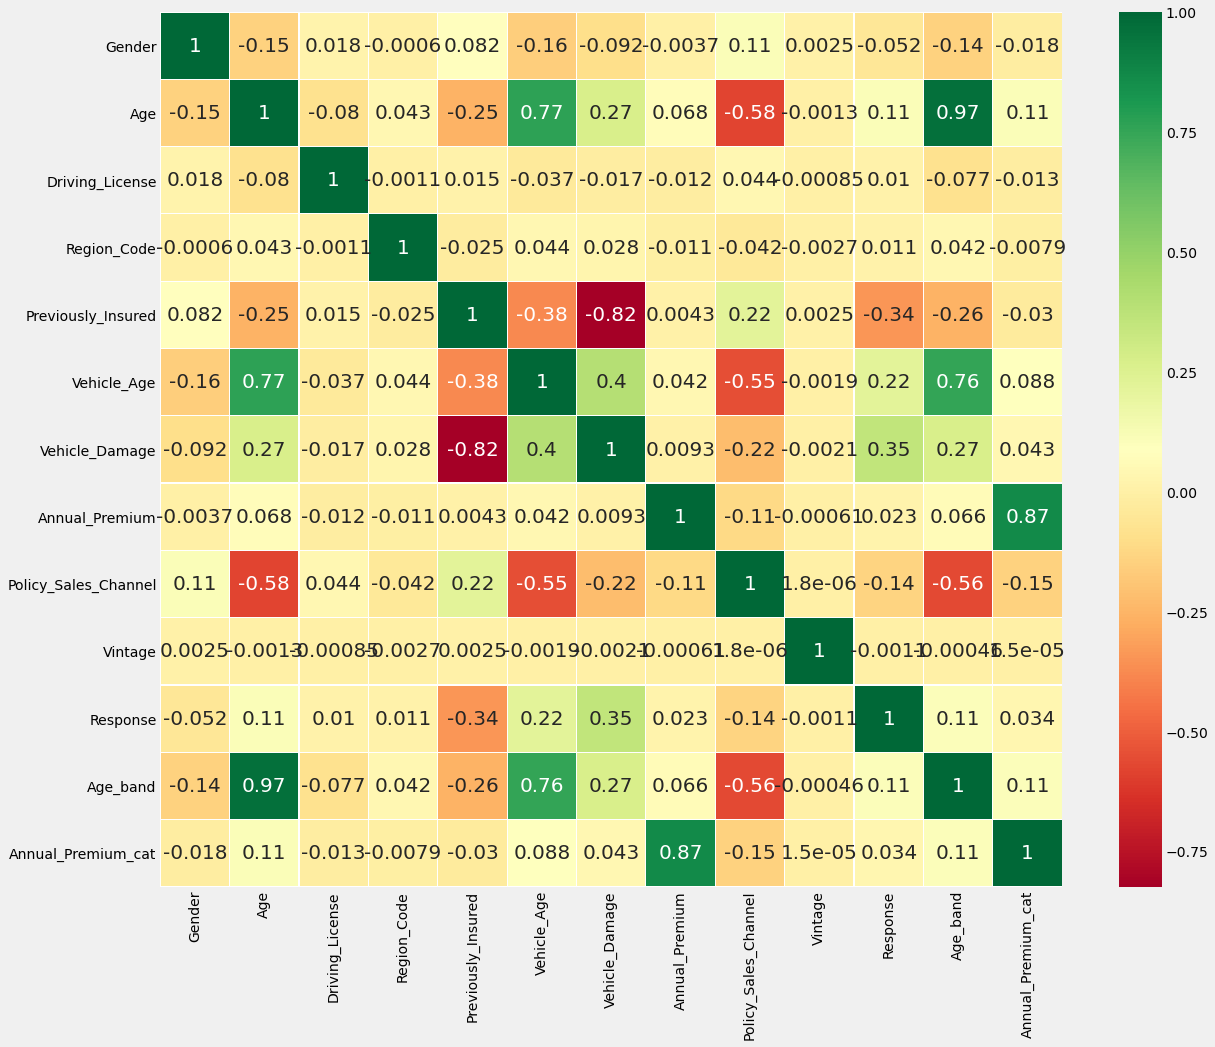

In [38]:
train.drop(['Annual_Premium_Range','id'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

# lightgbm

In [39]:
#importing all the required ML packages
import lightgbm as lgb
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

In [40]:

X=train
Y=train["Response"]
X.drop(['Response'],axis=1,inplace=True)

In [42]:
from sklearn.model_selection import StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
        
lgb_param = {'objective': 'binary',
             'metric': 'auc',
             'boosting_type': 'gbdt',
             'learning_rate': 0.01,
             'seed': 42,
             'max_depth': -1,
             'verbosity': -1,
            }
num_round=1009

kf = StratifiedKFold(n_splits=5, shuffle=True)
preds = np.ones(len(test))
for trn_idx, val_idx in kf.split(X, Y):
    trn_data = lgb.Dataset(X.iloc[trn_idx],
                               label=Y.iloc[trn_idx])
    
    val_data = lgb.Dataset(X.iloc[val_idx],
                               label=Y.iloc[val_idx])
    clf = lgb.train(lgb_param,
                    trn_data,
                    num_round,
                    valid_sets=[trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds=100)
    y_pred = clf.predict(test, num_iteration=100)
    
    preds += np.round(clf.predict(test))/5
    

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.851134	valid_1's auc: 0.849768
[200]	training's auc: 0.853575	valid_1's auc: 0.851606
[300]	training's auc: 0.855139	valid_1's auc: 0.852555
[400]	training's auc: 0.856175	valid_1's auc: 0.853085
[500]	training's auc: 0.856934	valid_1's auc: 0.853342
[600]	training's auc: 0.857409	valid_1's auc: 0.85339
Early stopping, best iteration is:
[589]	training's auc: 0.857366	valid_1's auc: 0.853399
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.850817	valid_1's auc: 0.849749
[200]	training's auc: 0.853499	valid_1's auc: 0.852139
[300]	training's auc: 0.854975	valid_1's auc: 0.853211
[400]	training's auc: 0.85591	valid_1's auc: 0.853778
[500]	training's auc: 0.856728	valid_1's auc: 0.85421
[600]	training's auc: 0.857227	valid_1's auc: 0.854257
[700]	training's auc: 0.85766	valid_1's auc: 0.85429
[800]	training's auc: 0.858434	valid_1's auc: 0.854341
[900]	training's auc: